In [34]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('Social_Network_Ads.csv')

In [36]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
df.shape

(400, 5)

In [38]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [39]:
Target = df.Purchased
Inputs = df.drop('Purchased',axis=1)
Inputs

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


In [40]:
temp = pd.get_dummies(Inputs.Gender)
Inputs = pd.concat([Inputs,temp],axis=1)
Inputs = Inputs.drop('Gender',axis='columns',)
Inputs.head()

,User ID,Age,EstimatedSalary,Female,Male
0,15624510,19,19000,False,True
1,15810944,35,20000,False,True
2,15668575,26,43000,True,False
3,15603246,27,57000,True,False
4,15804002,19,76000,False,True


In [41]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts = train_test_split(Inputs,Target,test_size=0.3,random_state=0)

In [42]:
from sklearn.naive_bayes import  GaussianNB
model = GaussianNB()
model.fit(x_tr,y_tr)

GaussianNB()

In [43]:
y_pred = model.predict(x_ts)

In [44]:
y_prod = model.predict_proba(x_ts)

In [45]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [46]:
y_ts.head(10)

132    0
309    0
341    0
196    0
246    0
60     0
155    0
261    1
141    0
214    0
Name: Purchased, dtype: int64

In [47]:
model.score(x_ts,y_ts)

0.8833333333333333

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(y_pred,y_ts)

In [50]:
cm

array([[74,  9],
       [ 5, 32]], dtype=int64)

<Axes: >

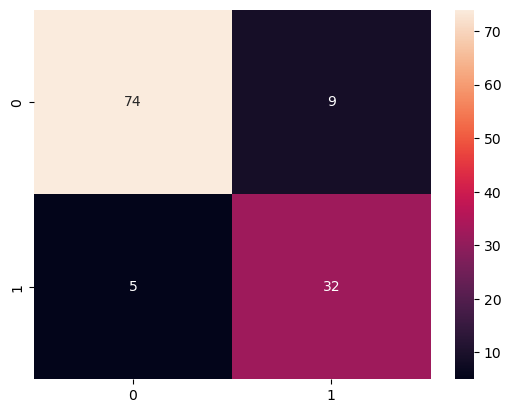

In [51]:
sns.heatmap(cm,annot=True)